TASK 1


In [ ]:
from google.colab import files
uploaded = files.upload()   # upload both Excel files here


Saving raw_combined_fifa_wc (1).xlsx to raw_combined_fifa_wc (1).xlsx


In [ ]:
from google.colab import files
uploaded = files.upload()   # upload both Excel files here


Saving cleaned_combined_fifa_wc (2).xlsx to cleaned_combined_fifa_wc (2).xlsx


In [ ]:
import pandas as pd
raw = pd.read_excel("raw_combined_fifa_wc (1).xlsx", engine="openpyxl")
print(raw.shape)
raw.head()


(1152, 15)


,year,team,goals_for,goals_against,matches_played,wins,draws,losses,finalist,team_code,association,rank,previous_rank,points,previous_points
0,1930,Brazil,6,3,7,2,0,0,0,BRA,CONMEBOL,1,1,1841.30,1837.56
1,1930,Belgium,18,6,5,2,0,2,0,BEL,UEFA,2,2,1816.71,1821.92
2,1930,Argentina,1,7,6,5,1,1,0,ARG,CONMEBOL,3,3,1773.88,1770.65
3,1930,France,0,11,4,5,0,0,0,FRA,UEFA,4,4,1759.78,1764.85
4,1930,England,9,11,6,5,1,2,0,ENG,UEFA,5,5,1728.47,1737.46


In [ ]:
import numpy as np

# Drop duplicates
raw = raw.drop_duplicates()

# Handle missing values
num_cols = raw.select_dtypes(include=[np.number]).columns
cat_cols = raw.select_dtypes(exclude=[np.number]).columns

for c in num_cols:
    raw[c] = raw[c].fillna(raw[c].median())
for c in cat_cols:
    raw[c] = raw[c].fillna("Unknown")

print("Missing values handled ✅")


Missing values handled ✅


Missing numeric values replaced with median; categorical with ‘Unknown’

In [ ]:
df = raw.copy()
df["goal_diff"] = df["goals_for"] - df["goals_against"]
df["goals_for_per_match"] = df["goals_for"] / df["matches_played"]
df["goals_against_per_match"] = df["goals_against"] / df["matches_played"]
df["win_rate"] = df["wins"] / df["matches_played"]
df["years_since_1930"] = df["year"] - 1930

# previous tournament stats per team
df = df.sort_values(["team","year"])
df["prev_rank"] = df.groupby("team")["rank"].shift(1)
df["prev_points"] = df.groupby("team")["points"].shift(1)
df.head()


,year,team,goals_for,goals_against,matches_played,wins,draws,losses,finalist,team_code,...,previous_rank,points,previous_points,goal_diff,goals_for_per_match,goals_against_per_match,win_rate,years_since_1930,prev_rank,prev_points
36,1930,Algeria,9,2,6,1,0,0,0,ALG,...,41,1489.1,1480.59,7,1.500000,0.333333,0.166667,0,NaN,NaN
84,1934,Algeria,4,12,7,5,2,0,0,ALG,...,41,1489.1,1480.59,-8,0.571429,1.714286,0.714286,4,37.0,1489.1
132,1938,Algeria,13,5,7,5,2,2,0,ALG,...,41,1489.1,1480.59,8,1.857143,0.714286,0.714286,8,37.0,1489.1
180,1942,Algeria,5,10,4,3,0,0,0,ALG,...,41,1489.1,1480.59,-5,1.250000,2.500000,0.750000,12,37.0,1489.1
228,1946,Algeria,16,9,3,5,1,2,0,ALG,...,41,1489.1,1480.59,7,5.333333,3.000000,1.666667,16,37.0,1489.1


These new variables quantify attack/defense efficiency and historic consistency

In [ ]:
df = pd.read_excel("cleaned_combined_fifa_wc (2).xlsx", engine="openpyxl")
print("✅ Cleaned dataset loaded successfully")
df.head()


✅ Cleaned dataset loaded successfully


,year,team,goals_for,goals_against,matches_played,wins,draws,losses,finalist,team_code,...,points,previous_points,continent,host,goal_diff,goals_for_per_match,goals_against_per_match,win_rate,stage_reached,years_since_1930
0,1930,Brazil,6,3,7,2,0,0,0,BRA,...,1841.30,1837.56,South America,1,3,0.857143,0.428571,0.285714,Group,0
1,1930,Belgium,18,6,5,2,0,2,0,BEL,...,1816.71,1821.92,Europe,1,12,3.600000,1.200000,0.400000,Group,0
2,1930,Argentina,1,7,6,5,1,1,0,ARG,...,1773.88,1770.65,Oceania,0,-6,0.166667,1.166667,0.833333,Semi-Final,0
3,1930,France,0,11,4,5,0,0,0,FRA,...,1759.78,1764.85,North America,0,-11,0.000000,2.750000,1.250000,Semi-Final,0
4,1930,England,9,11,6,5,1,2,0,ENG,...,1728.47,1737.46,Europe,0,-2,1.500000,1.833333,0.833333,Semi-Final,0


✅ All charts created!


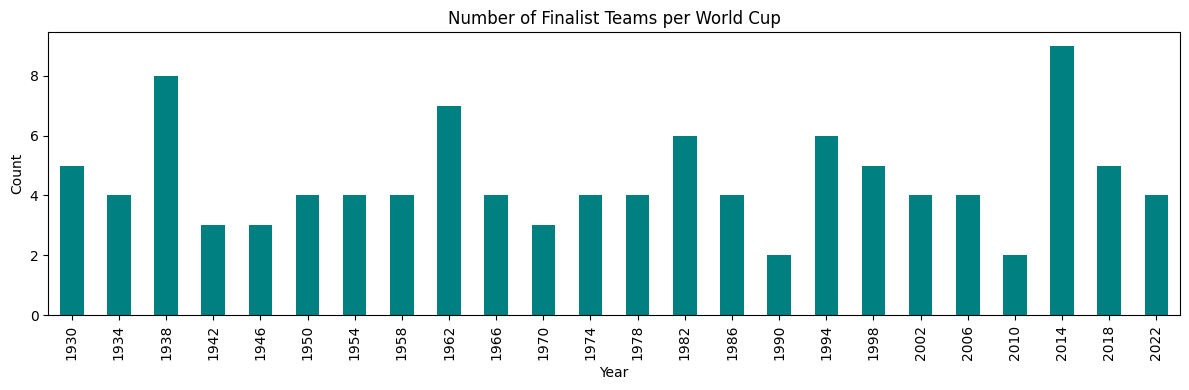

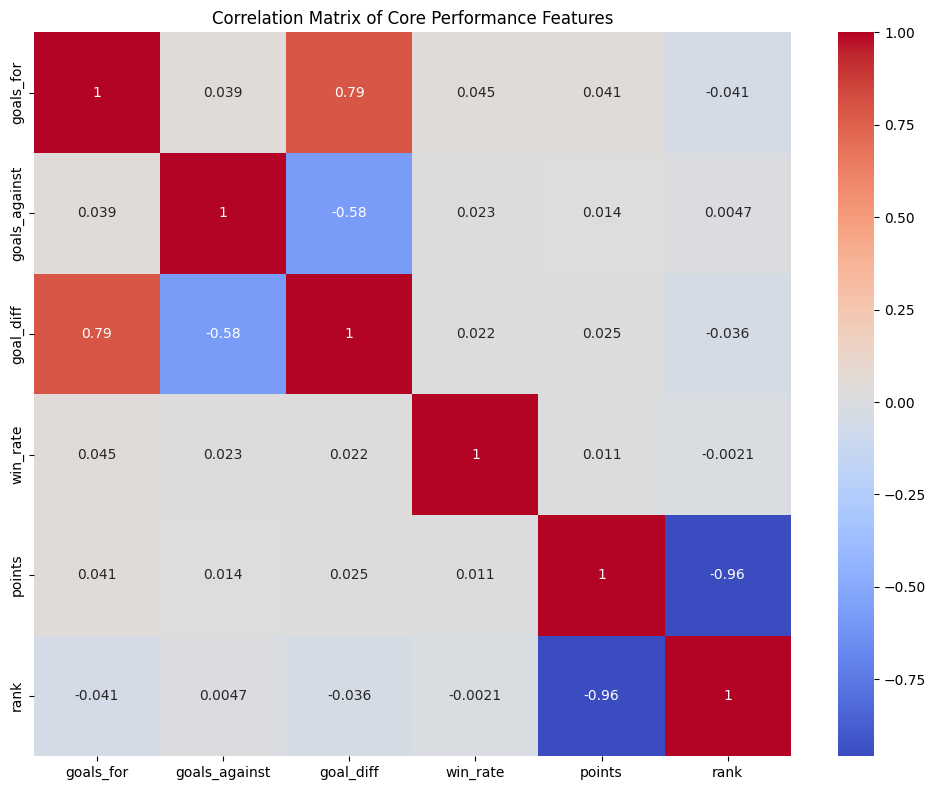

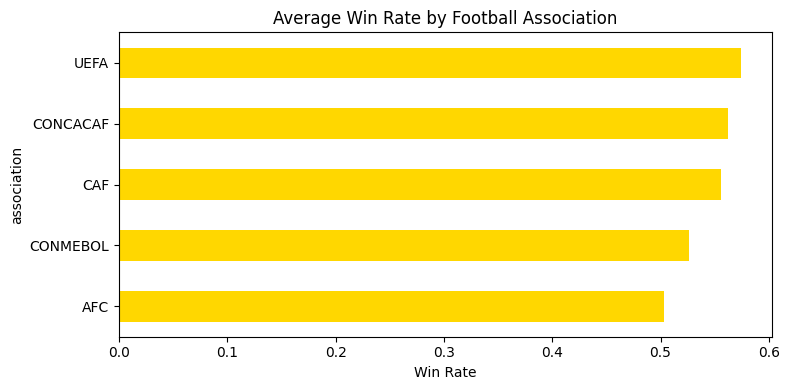

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns

# Finalists per Year
plt.figure(figsize=(12,4))
df.groupby("year")["finalist"].sum().plot(kind="bar", color="teal")
plt.title("Number of Finalist Teams per World Cup")
plt.xlabel("Year"); plt.ylabel("Count")
plt.tight_layout()
plt.savefig("finalists_per_year.png")

# Correlation Heatmap
plt.figure(figsize=(10,8))
sns.heatmap(df[["goals_for","goals_against","goal_diff","win_rate","points","rank"]].corr(),
            annot=True, cmap="coolwarm")
plt.title("Correlation Matrix of Core Performance Features")
plt.tight_layout()
plt.savefig("correlation_heatmap.png")

# Average Win Rate by Association
plt.figure(figsize=(8,4))
df.groupby("association")["win_rate"].mean().sort_values().plot(kind="barh", color="gold")
plt.title("Average Win Rate by Football Association")
plt.xlabel("Win Rate")
plt.tight_layout()
plt.savefig("winrate_by_association.png")

print("✅ All charts created!")
